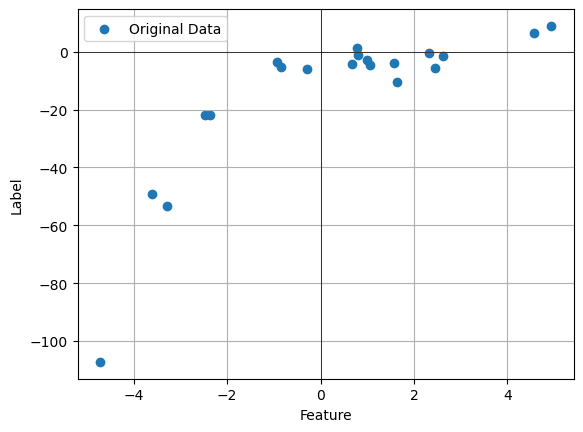

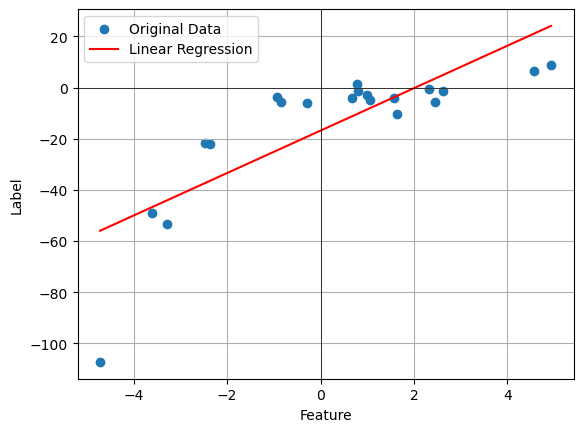

Theta values:
Theta 0: -16.79645048448471
Theta 1: 8.292387313549636


In [148]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# prepare dataset
data = pd.read_csv('data.csv', header=None, names=['feature', 'label'])
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values
x, y = zip(*sorted(zip(x,y))) # sort data keeping its corresponding data same
x = np.array(x)
y = np.array(y)

# original data plot
plt.scatter(x, y, label='Original Data')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

# 1) linear regression

# x matrix
x_matrix_linear = np.column_stack((np.ones_like(x), x))


# find theta using the normal equation θ = (X ′ X)^−1 X ′ y
theta_linear = np.linalg.inv(x_matrix_linear.T @ x_matrix_linear) @ x_matrix_linear.T @ y

# linear regression model
y_linear = x_matrix_linear @ theta_linear
#print(y_linear)

# plotting the linear regression model
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_linear, color='red', label='Linear Regression')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

print("Theta values:")
print("Theta 0:", theta_linear[0])
print("Theta 1:", theta_linear[1])


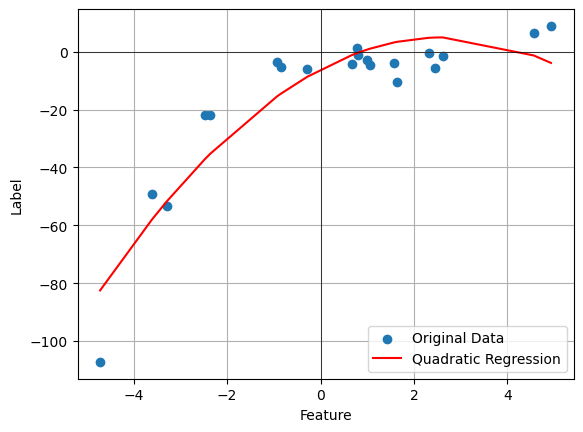

Theta values:
Theta 0: -6.119739262617226
Theta 1: 8.484926494693328
Theta 2: -1.62853125464724


In [149]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# X matrix
x_matrix_quad = np.column_stack((np.ones_like(x), x, x**2))


# Used Curve Fitting Method:
#           https://atozmath.com/example/CONM/LeastSquare.aspx?q=3&q1=E1 
#           https://skill-lync.com/student-projects/Linear-and-Cubic-curve-fitting-39329

def solve_quad_eqn(x_val,y_val):
    x_val = x_val.astype(float)
    y_val = y_val.astype(float)
    x_sq = x_val**2
    x_cube = x_val**3
    x_quad = x_val**4
    x_sq_y = x_sq*y_val
    x_mul_y = x_val*y_val
    
    left_eqn_matrix = np.array([
                                [np.sum(x_sq), np.sum(x_cube), np.sum(x_quad)],
                                [np.sum(x_val), np.sum(x_sq), np.sum(x_cube)],
                                [len(x_val), np.sum(x_val), np.sum(x_sq)]
                            ])

    right_eqn_matrix = np.array([np.sum(x_sq_y), np.sum(x_mul_y), np.sum(y_val)])
    
    #return theta values by solving the set of equations
    return np.linalg.solve(left_eqn_matrix, right_eqn_matrix)

#print(x_matrix_quad)

theta_quad = solve_quad_eqn(x, y)

# linear regression model
y_quad = x_matrix_quad @ theta_quad



# plotting the linear regression model
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_quad, color='red', label='Quadratic Regression')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

print("Theta values:")
print("Theta 0:", theta_quad[0])
print("Theta 1:", theta_quad[1])
print("Theta 2:", theta_quad[2])


[-2.13159984  0.99141501 -2.10330094  0.49338029]


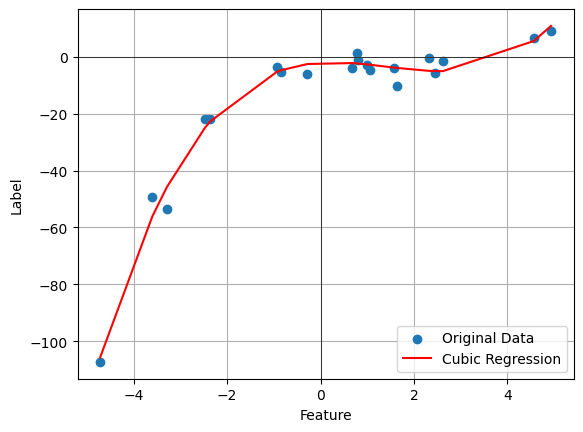

Theta values:
Theta 0: -2.1315998415308592
Theta 1: 0.9914150119650516
Theta 2: -2.1033009422408186
Theta 3: 0.49338028544309387


In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# X matrix
x_matrix_cube = np.column_stack((np.ones_like(x), x, x**2, x**3))

def solve_cubic_eqn(x_val,y_val):
    x_val = x_val.astype(float)
    y_val = y_val.astype(float)
    x_sq = x_val**2
    x_cube = x_val**3
    x_quad = x_val**4
    x_power_five = x_val**5
    x_power_six = x_val**6
    x_sq_y = x_sq*y_val
    x_cube_y = x_cube*y_val
    x_mul_y = x_val*y_val

    left_eqn_matrix = np.array([
        [np.sum(x_cube), np.sum(x_quad), np.sum(x_power_five), np.sum(x_power_six)],
        [np.sum(x_sq), np.sum(x_cube), np.sum(x_quad), np.sum(x_power_five)],
        [np.sum(x_val), np.sum(x_sq), np.sum(x_cube), np.sum(x_quad)],
        [len(x_val), np.sum(x_val), np.sum(x_sq), np.sum(x_cube)]
    ])


    right_eqn_matrix = np.array([np.sum(x_cube_y) ,np.sum(x_sq_y), np.sum(x_mul_y), np.sum(y_val)])

    #return theta values by solving the set of equations
    return np.linalg.solve(left_eqn_matrix, right_eqn_matrix)
    



theta_cube = solve_cubic_eqn(x, y)
print(theta_cube)
# linear regression model
y_cube = x_matrix_cube @ theta_cube



# plotting the cubic regression model
plt.scatter(x, y, label='Original Data')
plt.plot(x, y_cube, color='red', label='Cubic Regression')
plt.xlabel('Feature')
plt.ylabel('Label')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

print("Theta values:")
print("Theta 0:", theta_cube[0])
print("Theta 1:", theta_cube[1])
print("Theta 2:", theta_cube[2])
print("Theta 3:", theta_cube[3])


